# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [219]:
#print cities for sanity check
#print(cities)

In [7]:
#create a sample response to look at how data is arranged in json
#data_to_keep = ['city_name', 'lat', 'long', 'max_temp', 'cloudiness', 'wind_speed', 'humidity', 'country', 'date']
query_url = f"{url}appid={weather_api_key}&units={units}&q="
sample_req = requests.get(query_url+"kangaatsiaq").json()
print(sample_req)


{'coord': {'lon': -53.4641, 'lat': 68.3065}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 30.6, 'feels_like': 22.41, 'temp_min': 30.6, 'temp_max': 30.6, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 109, 'gust': 10.33}, 'clouds': {'all': 2}, 'dt': 1619326407, 'sys': {'country': 'GL', 'sunrise': 1619333640, 'sunset': 1619395754}, 'timezone': -7200, 'id': 3422683, 'name': 'Kangaatsiaq', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#million+1 th attempt
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#loop set up
city_name = []
lat = []
lon = []
max_temp = []
cloudiness = []
wind_speed = []
humidity = []
country = []
date = []

for city in cities:
    try:
        keep_response = requests.get(query_url + city).json()
        city_name.append(keep_response['name'])
        lat.append(keep_response['coord']['lat'])
        lon.append(keep_response['coord']['lon'])
        max_temp.append(keep_response['main']['temp_max'])
        cloudiness.append(keep_response['clouds']['all'])
        wind_speed.append(keep_response['wind']['speed'])
        humidity.append(keep_response['main']['humidity'])
        country.append(keep_response['sys']['country'])
        date.append(keep_response['dt'])
        print(f'processing record for: {city}')
    
    except KeyError:
        print('records missing for {city} skipping...')

print('done')
print(len(city_name))
print(len(lat))
print(len(lon))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

d for: grand gaube
processing record for: zarubino
processing record for: coquimbo
processing record for: kartaly
processing record for: shibata
records missing for {city} skipping...
processing record for: castro
processing record for: vaini
processing record for: albany
processing record for: matara
processing record for: vestmannaeyjar
processing record for: hermanus
processing record for: kholtoson
processing record for: kavaratti
processing record for: puri
processing record for: barrow
processing record for: jamestown
processing record for: hounde
processing record for: araure
processing record for: aykhal
processing record for: hilo
processing record for: neiafu
records missing for {city} skipping...
processing record for: laredo
processing record for: ushuaia
processing record for: san matias
processing record for: hithadhoo
processing record for: kodiak
processing record for: sabang
processing record for: klaksvik
processing record for: constitucion
processing record for: pont

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:

weather_dict = {
    "city": city_name,
    "latitude": lat,
    "longitude": lon,
    "max_temperature": max_temp,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "humidity": humidity,
    "country": country,
    "date": date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('cities.csv')
weather_df.head()


,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
0,Punta Arenas,-53.1500,-70.9167,42.80,0,3.44,75,CL,1619326413
1,Praia,14.9215,-23.5087,69.80,75,12.66,73,CV,1619326413
2,Rikitea,-23.1203,-134.9692,78.66,100,12.82,76,PF,1619326414
3,Kuytun,54.3419,101.5036,43.41,97,8.70,55,RU,1619326414
4,Yining,29.0361,114.5636,61.52,100,3.71,91,CN,1619326414


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
high_humidity = weather_df['humidity'] >= 101
print(high_humidity.value_counts())

False    584
Name: humidity, dtype: int64


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

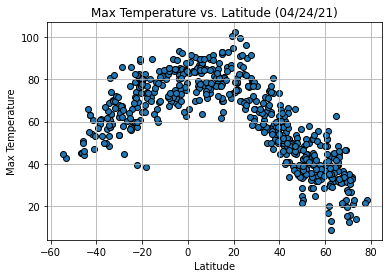

In [57]:
plt.scatter(weather_df['latitude'], weather_df['max_temperature'], edgecolors='black')
plt.title('Max Temperature vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/lat_v_temp.png')
plt.show()

In [ ]:
#Max Temp v. Latitude observations:

#This scatterplot allows us to observe the relationship between latitude and maximum temperature. 
#We see that there's a concentration of data points around the latitudes as we near the equator (lat=0).
#This supports what we know to be true, the closer we get to the equator, in either direction, the warmer the average temperature becomes.

## Latitude vs. Humidity Plot

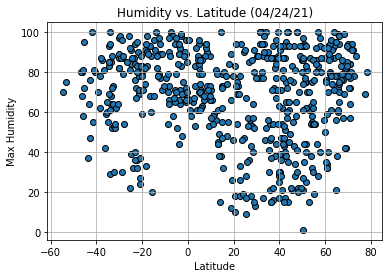

In [58]:
plt.scatter(weather_df['latitude'], weather_df['humidity'], edgecolors='black')
plt.title('Humidity vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid()
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/lat_v_humidity.png')
plt.show()

In [ ]:
#Humidity vs. Latitude observations:

#This scatterplot allows us to compare latitude and humidity levels to look at the relationship between the two as we approach the equator. 
#There doesn't appear to be a strong correlation between latitude and humidity according to this scatterplot
#I don't think this scatterplot is that useful for us.

## Latitude vs. Cloudiness Plot

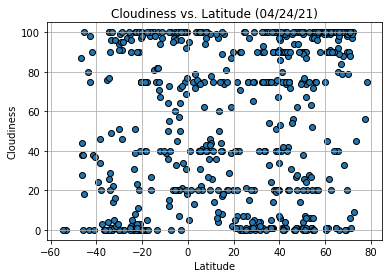

In [59]:
plt.scatter(weather_df['latitude'], weather_df['cloudiness'], edgecolors='black')
plt.title('Cloudiness vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/lat_v_cloud.png')
plt.show()

In [ ]:
#Cloudiness vs. Latitude

#This scatterplot allows us to look at the relationship between latitude and cloudiness. 
#This graph also doesn't appear to have a strong correlation between latitude and cloudiness, at least on this day
#It is interesting to see cloudiness index numbers clustered like they are and it would be interesting to look at a weather radar with cloud cover and compare the two. 

## Latitude vs. Wind Speed Plot

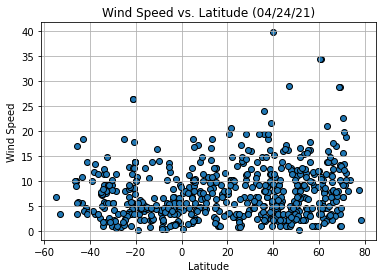

In [60]:
plt.scatter(weather_df['latitude'], weather_df['wind_speed'], edgecolors='black')
plt.title('Wind Speed vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/lat_v_wind.png')
plt.show()

In [ ]:
#Wind Speed vs. Latitude

#This scatterplot has us looking at the relationship between latitudes and wind speeds. At the timepoints that the data was collected for each city it appears that most of the cities sampled fall within the 0-20 mph wind speed. 

## Linear Regression

In [16]:
#split the data up by latitude- northern hemisphere
northern_hem = weather_df.loc[weather_df['latitude'] > 0, :]
northern_hem.head()

,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
1,Praia,14.9215,-23.5087,69.80,75,12.66,73,CV,1619326413
3,Kuytun,54.3419,101.5036,43.41,97,8.70,55,RU,1619326414
4,Yining,29.0361,114.5636,61.52,100,3.71,91,CN,1619326414
5,Grand Island,40.9250,-98.3420,52.00,1,6.91,54,US,1619326415
6,Fengzhen,40.4394,113.1536,59.45,96,15.35,39,CN,1619326415


In [17]:
#split the data up by latitude- southern hemisphere
southern_hem = weather_df.loc[weather_df['latitude'] < 0, :]
southern_hem.head()

,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
0,Punta Arenas,-53.1500,-70.9167,42.80,0,3.44,75,CL,1619326413
2,Rikitea,-23.1203,-134.9692,78.66,100,12.82,76,PF,1619326414
7,Esperance,-33.8667,121.9000,80.60,29,11.50,29,AU,1619326416
8,Mlonggo,-6.5333,110.7000,89.60,20,10.36,58,ID,1619326416
9,Amahai,-3.3333,128.9167,85.62,50,6.87,64,ID,1619326417


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value for Northern Hemisphere: Max Temp vs. Latitude is 0.7890503047848426


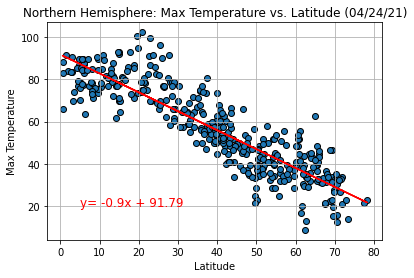

In [61]:

#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['max_temperature'])
print(f'The r-squared value for Northern Hemisphere: Max Temp vs. Latitude is {res.rvalue**2}')

plt.scatter(northern_hem['latitude'], northern_hem['max_temperature'], edgecolors='black')
plt.title('Northern Hemisphere: Max Temperature vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.annotate(line_eq, (5,20), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/NH_lat_v_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value for Southern Hemisphere: Max Temperature vs. Latitude is 0.4843830272036957


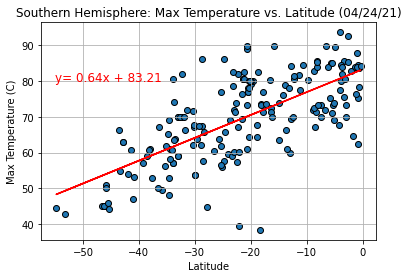

In [62]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['max_temperature'])
print(f'The r-squared value for Southern Hemisphere: Max Temperature vs. Latitude is {res.rvalue**2}')

plt.scatter(southern_hem['latitude'], southern_hem['max_temperature'], edgecolors='black')
plt.title('Southern Hemisphere: Max Temperature vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq, (-55,80), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/SH_lat_v_temp.png')
plt.show()

In [ ]:
#Northern and Southern Temperature vs. Latitude observations

#The linear regression models for us what we know to be true, that as latitude increases towards the equator from the Southern Hemisphere, so does temperature.
#As we head into the Northern Hemisphere from the equator, the temperature decreases as latitude increases. The Northern Hemisphere graph has a strong correlation between latitude and temperature, with an r-squared value of ~0.789 indicating that 78.9% of the variability in our data can be explained through the linear regression line. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value for Northern Hemisphere: Humidity vs. Latitude is 0.008138504330175853


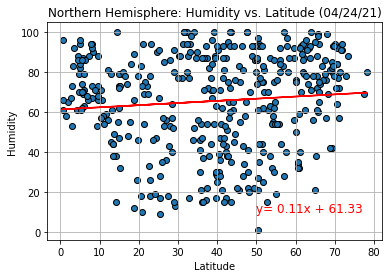

In [63]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['humidity'])
print(f'The r-squared value for Northern Hemisphere: Humidity vs. Latitude is {res.rvalue**2}')

plt.scatter(northern_hem['latitude'], northern_hem['humidity'], edgecolors='black')
plt.title('Northern Hemisphere: Humidity vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq, (50,10), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/NH_lat_v_humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value for Southern Hemisphere: Humidity vs. Latitude is 0.022515134494377316


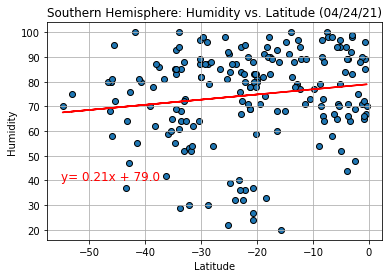

In [64]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['humidity'])
print(f'The r-squared value for Southern Hemisphere: Humidity vs. Latitude is {res.rvalue**2}')

plt.scatter(southern_hem['latitude'], southern_hem['humidity'], edgecolors='black')
plt.title('Southern Hemisphere: Humidity vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq, (-55,40), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/SH_lat_v_humidity.png')
plt.show()

In [ ]:
#Northern and Southern Humidity vs. Latitude observations

#We are looking at latitude versus humidity across the southern and northern hemisphere latitudes. Our r-squared values obtained from the linear regressions, tell us that very little of the variability of the data can be explained by the linear regression equation. That means that the line doesn't model our data very well. And highlights the point I made in the first graph of latitude v. humidity, that the relationship between the two wasn't strong for the data we looked at on this particular day.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value for Northern Hemisphere: Cloudiness vs. Latitude is 0.034986163712763814


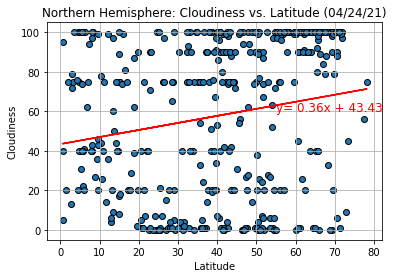

In [66]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['cloudiness'])
print(f'The r-squared value for Northern Hemisphere: Cloudiness vs. Latitude is {res.rvalue**2}')

plt.scatter(northern_hem['latitude'], northern_hem['cloudiness'], edgecolors='black')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq, (55,60), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/NH_lat_v_clouds.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value for Southern Hemisphere: Cloudiness vs. Latitude is 0.05506171614369816


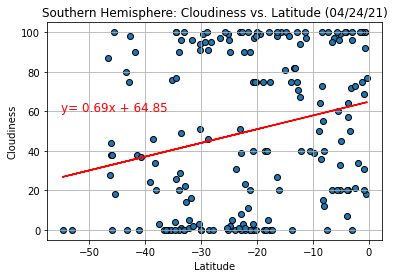

In [67]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['cloudiness'])
print(f'The r-squared value for Southern Hemisphere: Cloudiness vs. Latitude is {res.rvalue**2}')

plt.scatter(southern_hem['latitude'], southern_hem['cloudiness'], edgecolors='black')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq, (-55,60), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/SH_lat_v_clouds.png')
plt.show()

In [ ]:
#Northern and Southern Cloudiness vs. Latitude observations

#We are modeling the cloudiness levels vs. latitude for both hemispheres. These models aren't showing a strong correlation between cloudiness and change in latitude. The r-squared values are too small, which means that the linear regression equations don't account for much of the variability in our data. This would be an interesting variable to follow throughout the year and then get averages. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value for Northern Hemisphere: Wind Speed vs. Latitude is 0.010676033565559614


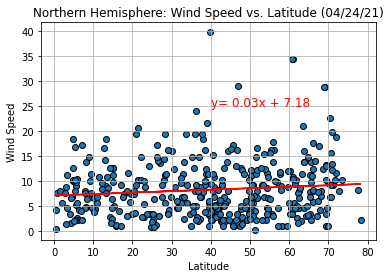

In [68]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['wind_speed'])
print(f'The r-squared value for Northern Hemisphere: Wind Speed vs. Latitude is {res.rvalue**2}')

plt.scatter(northern_hem['latitude'], northern_hem['wind_speed'], edgecolors='black')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq, (40,25), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/NH_lat_v_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value for Southern Hemisphere: Wind Speed vs. Latitude is 0.029566583394808554


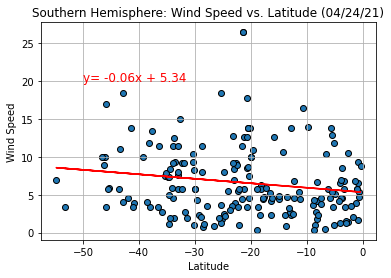

In [69]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['wind_speed'])
print(f'The r-squared value for Southern Hemisphere: Wind Speed vs. Latitude is {res.rvalue**2}')

plt.scatter(southern_hem['latitude'], southern_hem['wind_speed'], edgecolors='black')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq, (-50,20), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.savefig('/Users/bitty/python-api-challenge/python-api-challenge/output_data/SH_lat_v_wind.png')
plt.show()

In [ ]:
#Northern and Southern Wind Speed vs. Latitude observations

#We are modeling the relationship between wind speed and latitude. This is another model that when we calculate our linear regression line, we find that we get low r-squared values, meaning very little of our variation in data can be explained by our line. There isn't a strong correlation between the latitude and the wind speed we find there. Weather data is finiky though, climate data is better for analyzing global trends because we have more data points collected over time, whereas with weather one day there may appear to be a correlation between two variables and the next day it doesn't appear that they are related at all. 